In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [46]:
data = pd.read_csv("Downloads\\training-data1.csv") 
data

,Intersection,City,Province,Vehicle Traffic,Pedestrian Traffic
0,JARVIS ST and FRONT ST E,Toronto,ON,15662,13535
1,KING ST E and JARVIS ST,Toronto,ON,12960,7333
2,JARVIS ST and ADELAIDE ST E,Toronto,ON,17770,7083
3,JARVIS ST and RICHMOND ST E,Toronto,ON,19678,4369
4,JARVIS ST and QUEEN ST E,Toronto,ON,14487,3368
5,JARVIS ST and SHUTER ST,Toronto,ON,15846,3747
6,JARVIS ST and DUNDAS ST E,Toronto,ON,17835,5858
7,JARVIS ST and GERRARD ST E,Toronto,ON,18196,6493
8,JARVIS ST and CARLTON ST,Toronto,ON,14222,6165
9,JARVIS ST and WELLESLEY ST E,Toronto,ON,18163,5213


In [3]:
data_trunc = data.loc[:,'Vehicle Traffic':'Pedestrian Traffic']
data_trunc_array=data_trunc.as_matrix()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

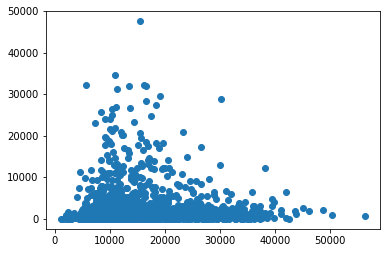

In [4]:
plt.plot(data_trunc_array[:,0],data_trunc_array[:,1], 'o')
plt.show

In [6]:
data_trunc_TSNE = TSNE(n_components=2).fit_transform(data_trunc)

In [7]:
data_trunc_TSNE

array([[-25.396965,  39.936794],
       [-25.576214,  28.084103],
       [-19.732632,  34.68855 ],
       ...,
       [-43.04346 , -11.163238],
       [-74.314545,  19.6663  ],
       [-73.41521 ,  20.029905]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

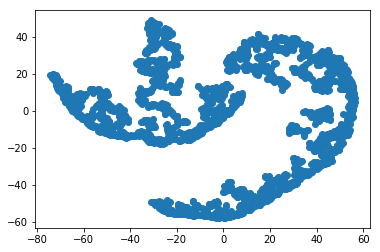

In [9]:
plt.plot(data_trunc_TSNE[:,0],data_trunc_TSNE[:,1], 'o')
plt.show

In [15]:
data_k = KMeans(n_clusters=7, random_state=0).fit(data_trunc_TSNE)

In [22]:
data_k.labels_

array([4, 4, 4, ..., 0, 0, 0])

In [26]:
data_k.predict([[12000,12000]])[0]

6

In [19]:
data_labels = pd.DataFrame(data_k.labels_)

In [33]:
data_total = pd.concat([data_labels, data], axis=1)
data_total

,0,Intersection,City,Province,Vehicle Traffic,Pedestrian Traffic
0,4,JARVIS ST and FRONT ST E,Toronto,ON,15662,13535
1,4,KING ST E and JARVIS ST,Toronto,ON,12960,7333
2,4,JARVIS ST and ADELAIDE ST E,Toronto,ON,17770,7083
3,1,JARVIS ST and RICHMOND ST E,Toronto,ON,19678,4369
4,2,JARVIS ST and QUEEN ST E,Toronto,ON,14487,3368
5,2,JARVIS ST and SHUTER ST,Toronto,ON,15846,3747
6,1,JARVIS ST and DUNDAS ST E,Toronto,ON,17835,5858
7,1,JARVIS ST and GERRARD ST E,Toronto,ON,18196,6493
8,4,JARVIS ST and CARLTON ST,Toronto,ON,14222,6165
9,1,JARVIS ST and WELLESLEY ST E,Toronto,ON,18163,5213


In [45]:
is_val = data_total[0]==4
data_total_4 = data_total[is_val]
print(data_total_4['Intersection'].values)

['JARVIS ST and FRONT ST E' 'KING ST E and JARVIS ST'
 'JARVIS ST and ADELAIDE ST E' 'JARVIS ST and CARLTON ST'
 'BLOOR ST E and TED ROGERS WAY' 'CHURCH ST and FRONT ST E'
 'KING ST E and CHURCH ST' 'CHURCH ST and ADELAIDE ST E'
 'CHURCH ST and RICHMOND ST E' 'QUEEN ST E and CHURCH ST'
 'CHURCH ST and SHUTER ST' 'DUNDAS ST E and CHURCH ST'
 'CHURCH ST and GERRARD ST E' 'CHURCH ST and CARLTON ST'
 'CHURCH ST and WELLESLEY ST E' 'BLOOR ST E and CHURCH ST'
 'ADELAIDE ST E and VICTORIA ST' 'VICTORIA ST and RICHMOND ST E'
 'QUEEN ST E and VICTORIA ST' 'YONGE ST and FRONT ST'
 'YONGE ST and WELLINGTON ST' 'YONGE ST and KING ST'
 'YONGE ST and ADELAIDE ST' 'YONGE ST and RICHMOND ST'
 'YONGE ST and QUEEN ST' 'YONGE ST and SHUTER ST' 'YONGE ST and DUNDAS ST'
 'YONGE ST and GERRARD ST' 'YONGE ST and CARLTON ST'
 'YONGE ST and WELLESLEY ST' 'BLOOR ST and YONGE ST'
 'YONGE ST and CHURCH ST' 'YONGE ST and CRESCENT RD'
 'YONGE ST and SHAFTESBURY AVE' 'YONGE ST and ST CLAIR AVE'
 'YONGE ST and CHAPLI